In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from datetime import datetime
from datetime import timedelta
from dateutil import rrule
import time


  - **Boston Metro (MA, NH, RI, CT)**
      - **Massachusetts**
          -  **Boston-Cambridge-Newton Metro**
              - Essex County, Middlesex County, Norfolk County, Plymouth County, Suffolk County
          - **Worcester-Metro**
            - Worcester County
          
      - **New Hampshire**
          - **Boston-Cambridge-Newton Metro**
              - Rockingham County, Strafford County
        - **Manchester-Nashua Metro**
            - Hillsborough County 
              
      - **Rhode Island**
          - **Providence-Warwick Metro**
              - Bristol County, Kent County, Newport County, Providence County, Washington County

    - **Connecticut**
      - **Worcester Metro**
          - Windham County

In [2]:
# Load the data from the CSV file
data = pd.read_csv('updated_filtered_zhvi_price_data.csv')

# Set "RegionFullName" as the index
data.set_index('RegionFullName', inplace=True)

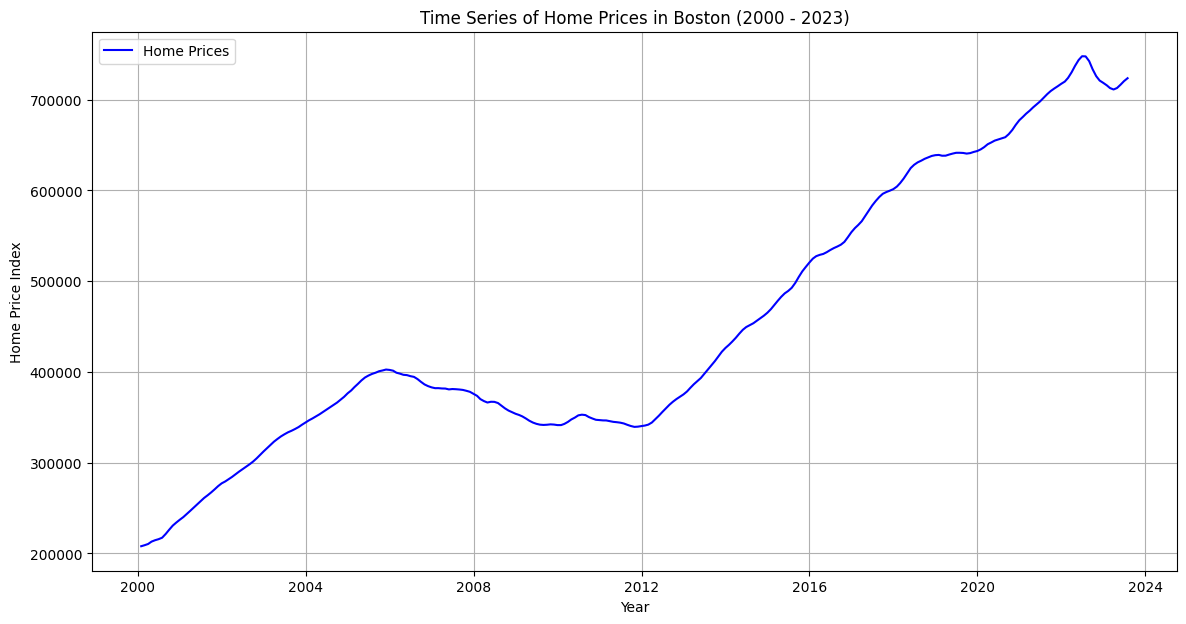

In [3]:

# Filter the dataset to only include New York City's data
bos_data = data[data['RegionName'] == 'Boston'].iloc[0]

# Extract the dates and their corresponding home prices
dates = pd.to_datetime(bos_data.index[8:-1])
prices = bos_data.values[8:-1]

# Create a time series plot
plt.figure(figsize=(14, 7))
plt.plot(dates, prices, label='Home Prices', color='blue')
plt.title('Time Series of Home Prices in Boston (2000 - 2023)')
plt.xlabel('Year')
plt.ylabel('Home Price Index')
plt.grid(True)
plt.legend()
plt.show()

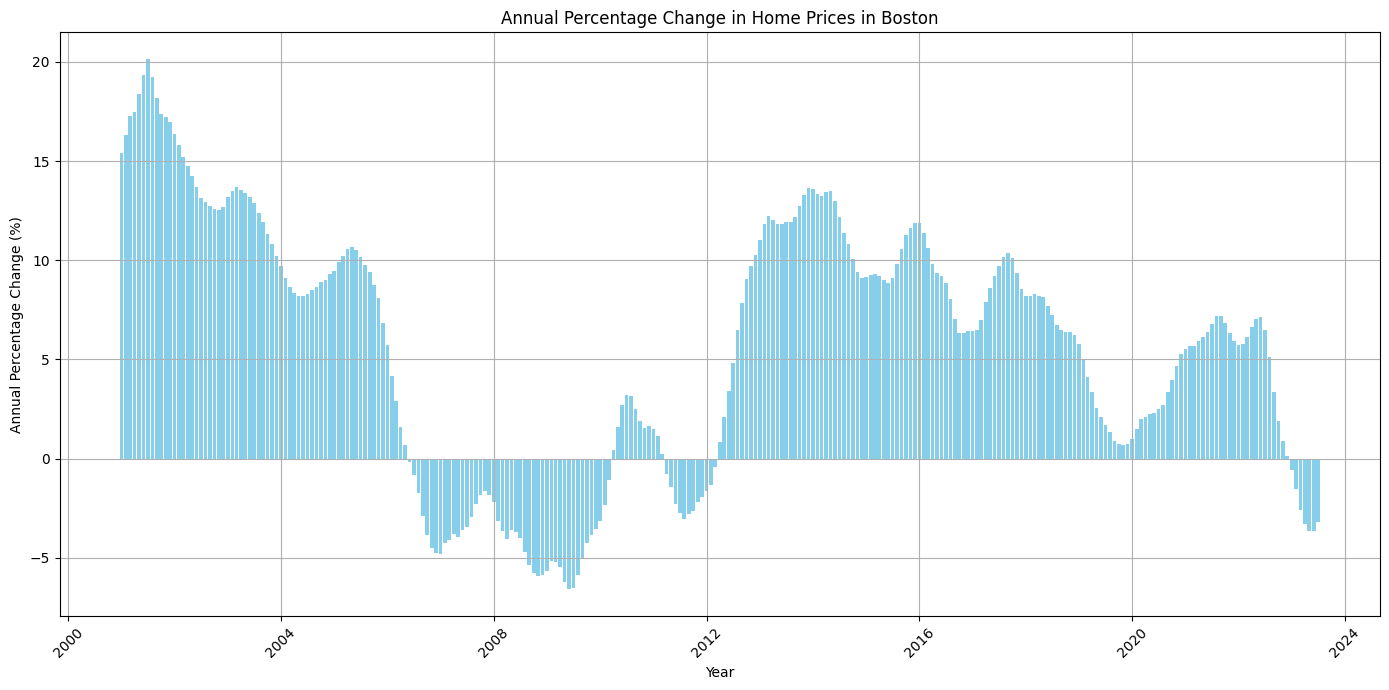

In [4]:
# Assuming you've already loaded your data and selected the Boston region
boston_data = data[data['RegionName'] == 'Boston'].iloc[0]
prices = pd.to_numeric(boston_data[8:-1])  # Assuming home prices start from the 9th column
annual_pct_change = prices.pct_change(12) * 100  # Calculate percentage change annually

# Adjust the dates to skip the first year and convert to period for consistent bar width
dates = pd.to_datetime(boston_data.index[8:-1])[12:].to_period('M')

plt.figure(figsize=(14, 7))
# Set the width parameter to 1 to make the bars thicker and continuous
plt.bar(dates.to_timestamp(), annual_pct_change.dropna(), width=25, color='skyblue', align='center')
plt.title('Annual Percentage Change in Home Prices in Boston')
plt.xlabel('Year')
plt.ylabel('Annual Percentage Change (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

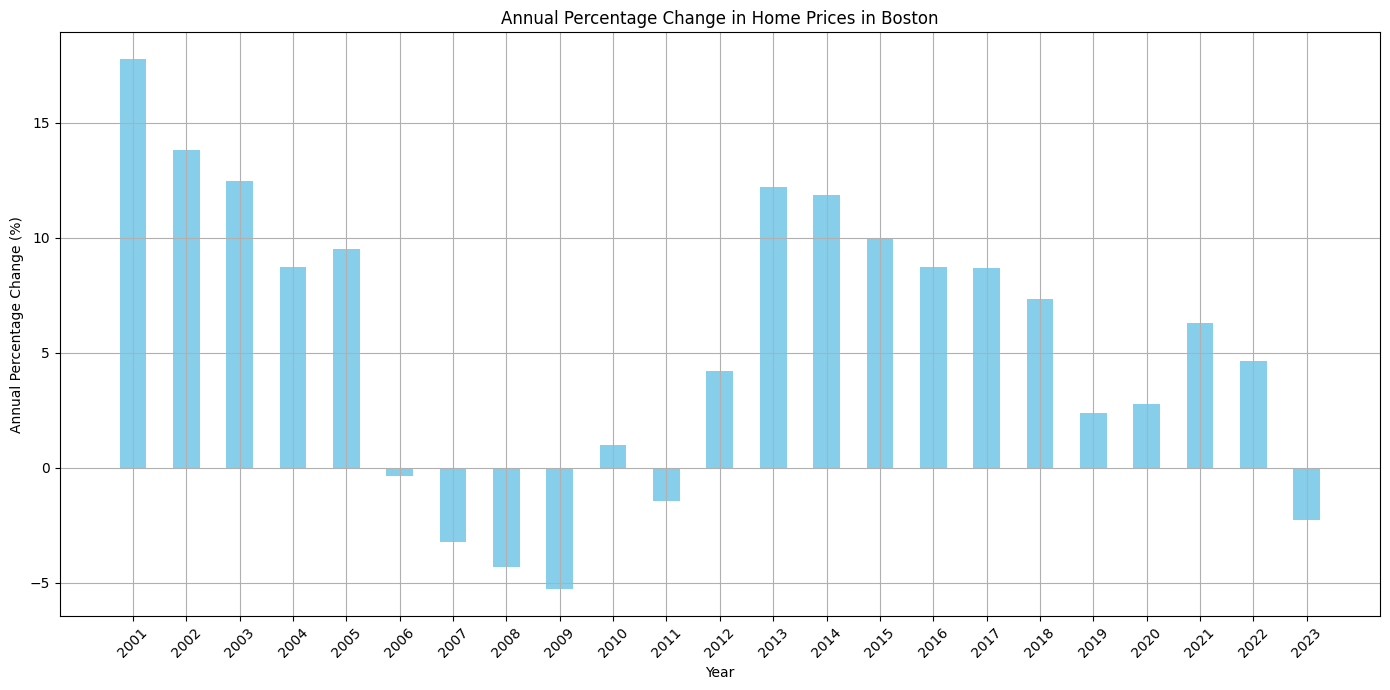

In [5]:
# Assuming you've already loaded your data and selected the Boston region
boston_data = data[data['RegionName'] == 'Boston'].iloc[0]
prices = pd.to_numeric(boston_data[8:-1])  # Assuming home prices start from the 9th column

# Convert index to datetime and ensure it's at year frequency for easier processing
prices.index = pd.to_datetime(boston_data.index[8:-1]).year

# Aggregate prices by year by taking the mean (or you could choose another method like last())
annual_prices = prices.groupby(prices.index).mean()

# Calculate the year-over-year percentage change
annual_pct_change = annual_prices.pct_change() * 100  # Calculate percentage change annually

# Prepare the years for the x-axis
years = annual_pct_change.index[1:]  # Skipping the first year which is NaN in pct_change

plt.figure(figsize=(14, 7))
# Set the width parameter to 0.5 for clearer separation between bars
plt.bar(years, annual_pct_change.dropna(), width=0.5, color='skyblue', align='center')
plt.title('Annual Percentage Change in Home Prices in Boston')
plt.xlabel('Year')
plt.ylabel('Annual Percentage Change (%)')
plt.xticks(years, rotation=45)  # Set x-ticks to be the years
plt.grid(True)
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()

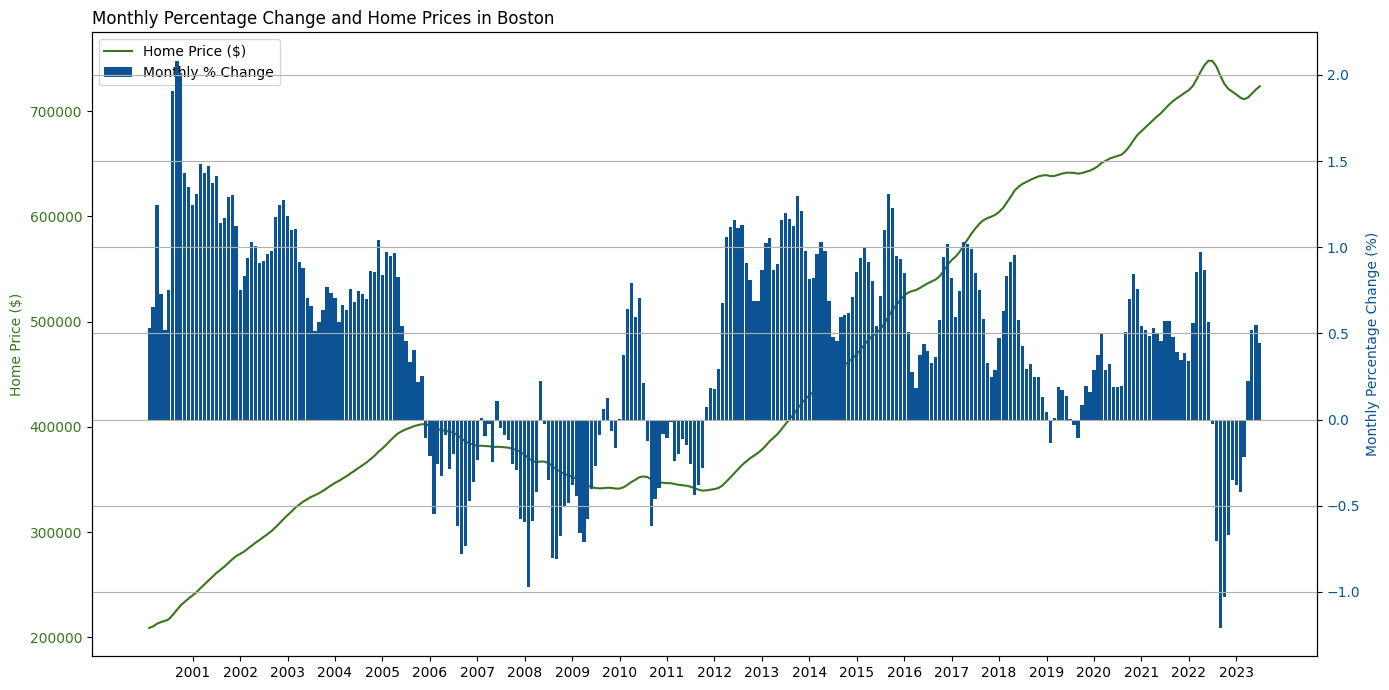

In [10]:

# Assuming you've already loaded your data and selected the Boston region
boston_data = data[data['RegionName'] == 'Boston'].iloc[0]
prices = pd.to_numeric(boston_data[8:-1])  # Assuming home prices start from the 9th column
monthly_pct_change = prices.pct_change(1) * 100  # Calculate percentage change monthly

# Adjust the dates to skip the first month
dates = pd.to_datetime(boston_data.index[8:-1])[1:].to_period('M')

# Initialize the plot with specified figure size
fig, ax1 = plt.subplots(figsize=(14, 7))

# Normally, ax1 would be for % change and ax2 for prices.
# We are switching them here so ax1 will be for home prices.
color_price = '#38761d'  # A darker shade of green
ax1.plot(dates.to_timestamp(), prices[1:], color=color_price, label='Home Price ($)')
ax1.set_ylabel('Home Price ($)', color=color_price)
ax1.tick_params(axis='y', labelcolor=color_price)

# Create a secondary y-axis for monthly percentage change now
ax2 = ax1.twinx()
color_pct = '#0b5394'  # A darker shade of blue
ax2.bar(dates.to_timestamp(), monthly_pct_change.dropna(), width=25, color=color_pct, label='Monthly % Change', align='center')
ax2.set_ylabel('Monthly Percentage Change (%)', color=color_pct)
ax2.tick_params(axis='y', labelcolor=color_pct)

# Set x-ticks to only display the first month of each year for clarity
ax2.set_xticks([date.to_timestamp() for date in dates if date.month == 1])
ax2.set_xticklabels([date.strftime('%Y') for date in dates if date.month == 1], rotation=45)

# Add a title and grid
plt.title('Monthly Percentage Change and Home Prices in Boston', loc='left')  # Title anchored to the left
plt.grid(True)

# Adding a legend that combines both plots but with inverted labels
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust layout to make room for rotated x-axis labels
plt.tight_layout()
plt.show()
